In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("births.csv")

In [3]:
# Q.1: Add a new column “Decade” by calculating. For example 1969 will be 1960, 1988 will 1980 etc.
df['Decade'] = (df['year'] // 10) * 10

In [4]:
# Q.2: Show the descriptive statistics of the data.
print("Descriptive Statistics of the Data:")
print(df.describe())

Descriptive Statistics of the Data:
               year         month           day         births        Decade
count  15547.000000  15547.000000  15067.000000   15547.000000  15547.000000
mean    1979.037435      6.515919     17.769894    9762.293561   1974.544285
std        6.728340      3.449632     15.284034   28552.465810      6.789583
min     1969.000000      1.000000      1.000000       1.000000   1960.000000
25%     1974.000000      4.000000      8.000000    4358.000000   1970.000000
50%     1979.000000      7.000000     16.000000    4814.000000   1970.000000
75%     1984.000000     10.000000     24.000000    5289.500000   1980.000000
max     2008.000000     12.000000     99.000000  199622.000000   2000.000000


In [5]:
# Q.3: Check if your data contains any missing values
print("\nMissing Values Check:")
print(df.isnull().sum())


Missing Values Check:
year        0
month       0
day       480
gender      0
births      0
Decade      0
dtype: int64


In [6]:
# Q.4: What is the trend of male & female births every decade?
trend_df = df.groupby(['Decade', 'gender'])['births'].sum().unstack()
print("\nTrend of Male & Female Births Every Decade:")
print(trend_df)


Trend of Male & Female Births Every Decade:
gender         F         M
Decade                    
1960     1753634   1846572
1970    16263075  17121550
1980    18310351  19243452
1990    19479454  20420553
2000    18229309  19106428


In [7]:
# Q.5: To remove outliers from dataset
mean = df['births'].mean()
std_dev = df['births'].std()
df = df[(df['births'] >= mean - 5 * std_dev) & (df['births'] <= mean + 5 * std_dev)]


<Figure size 1000x600 with 0 Axes>

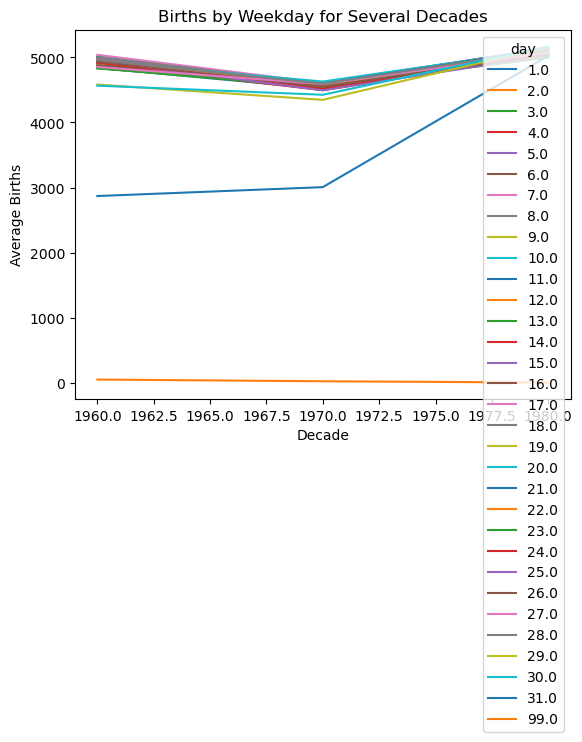

In [8]:
# Q.6: Plot births by weekday for several decades. 
plt.figure(figsize=(10, 6))
df.groupby(['Decade', 'day'])['births'].mean().unstack().plot()
plt.title("Births by Weekday for Several Decades")
plt.xlabel("Decade")
plt.ylabel("Average Births")

plt.show()

In [9]:
# Q.7: Group the data by month and day separately
grouped_month = df.groupby('month')['births'].mean()
grouped_day = df.groupby('day')['births'].mean()

print("\nAverage Births by Month:")
print(grouped_month)
print("\nAverage Births by Day:")
print(grouped_day)


Average Births by Month:
month
1     4549.421801
2     6240.651029
3     4620.985039
4     4577.108173
5     4573.598419
6     4614.770032
7     4905.975552
8     4972.636722
9     4973.385417
10    4776.177445
11    4908.059856
12    4657.008675
Name: births, dtype: float64

Average Births by Day:
day
1.0     4764.279167
2.0     4798.266667
3.0     4810.597917
4.0     4763.725000
5.0     4785.314583
6.0     4808.485417
7.0     4821.002083
8.0     4838.283333
9.0     4823.031250
10.0    4848.327083
11.0    4832.418750
12.0    4839.491667
13.0    4772.700000
14.0    4865.731250
15.0    4861.304167
16.0    4859.283333
17.0    4865.537500
18.0    4864.477083
19.0    4856.631250
20.0    4870.064583
21.0    4853.256250
22.0    4828.564583
23.0    4802.445833
24.0    4771.875000
25.0    4758.281250
26.0    4792.100000
27.0    4821.016667
28.0    4851.312500
29.0    4718.271552
30.0    4759.528889
31.0    3697.316804
99.0      18.294286
Name: births, dtype: float64


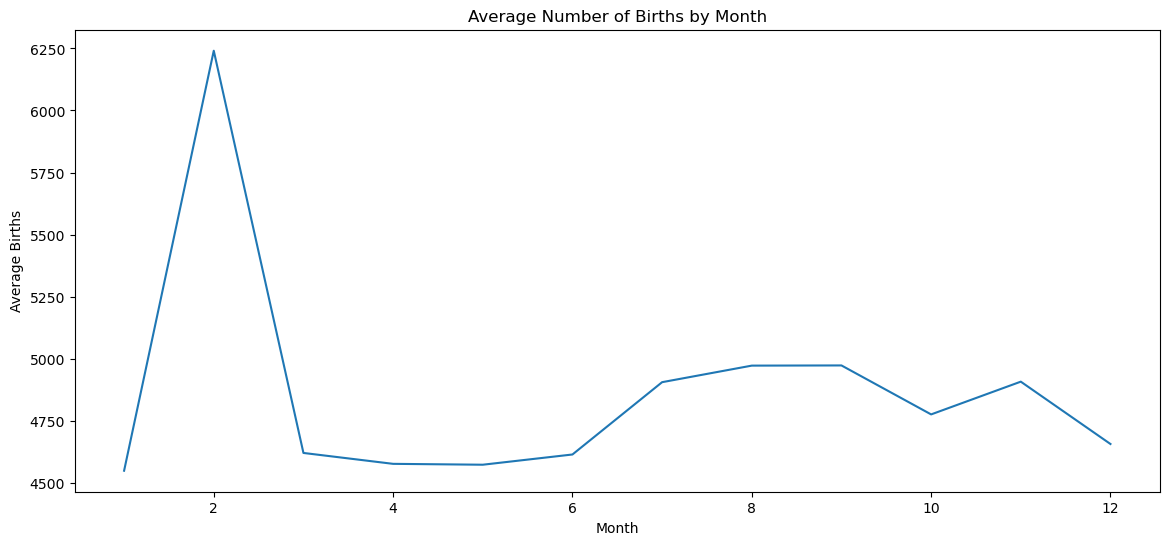

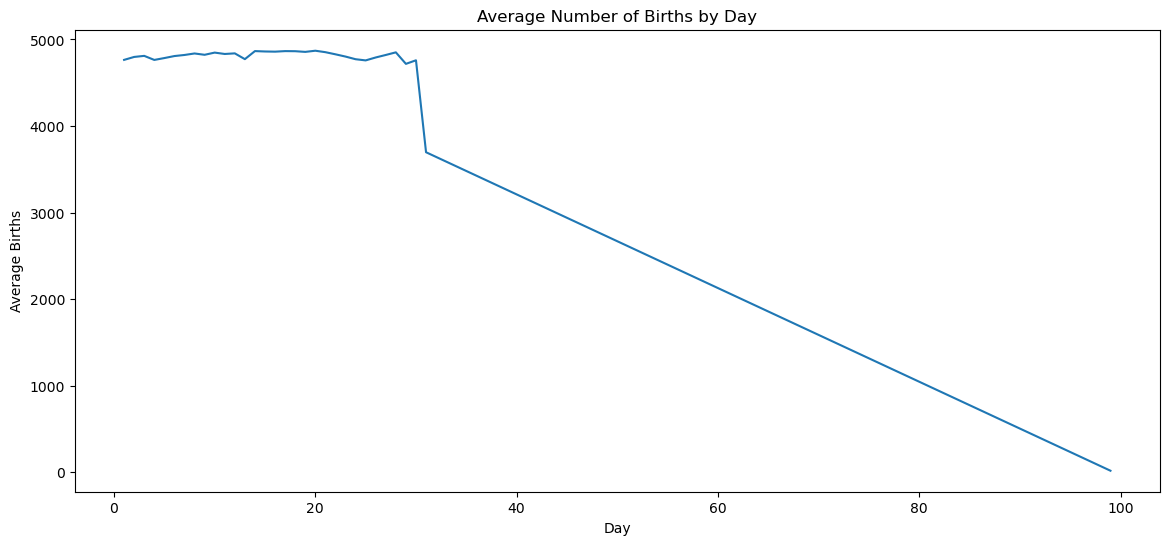

In [10]:
# Q.8: Plot the average number of births by date of the year
plt.figure(figsize=(14, 6))
grouped_month.plot(title="Average Number of Births by Month", xlabel="Month", ylabel="Average Births")
plt.show()

plt.figure(figsize=(14, 6))
grouped_day.plot(title="Average Number of Births by Day", xlabel="Day", ylabel="Average Births")
plt.show()